In [186]:
import numpy as np 
import random
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from time import time
from networks import Population
import pickle

random.seed(0)
np.random.seed(0)

In [187]:
import numpy as np
import pandas as pd
from pathlib import Path
import os

import sys
sys.path.append("..")

import matplotlib.pyplot as plt

In [188]:
import networks

data_dir = Path("../data")

multimodal_train = pd.read_csv(data_dir / "multimodal-large-training.csv", index_col=False)
multimodal_test = pd.read_csv(data_dir / "multimodal-large-test.csv", index_col=False)

from sklearn import datasets

iris = datasets.load_iris()

X = iris["data"]
y = iris["target"]

In [189]:
# example definition of a neural network
layers = [
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"activation": "linear", "init": "normal"}
]

In [190]:
X_train = multimodal_train[["x"]].to_numpy()
X_test = multimodal_test[["x"]].to_numpy()

y_train =  multimodal_train[["y"]].to_numpy()
y_test = multimodal_test[["y"]].to_numpy()

layers = [
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"activation": "linear", "init": "normal"}
]

population = Population(layers, X_train, y_train, X_test, y_test)

population.generate_individuals(30)
print(population)

Population with 30 individuals


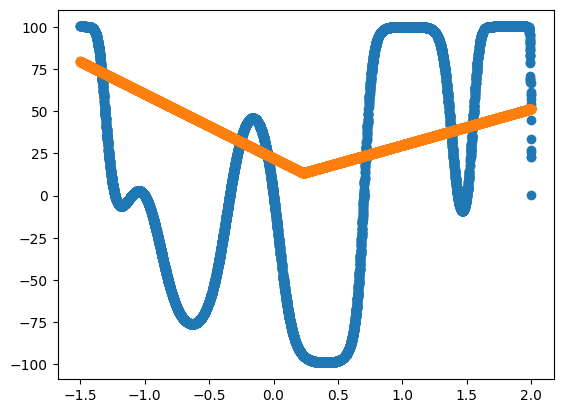

In [193]:
plt.scatter(X_train, y_train, label="training data")
plt.scatter(X_train, population.predict(population.individuals[0]))

In [192]:
print("Best score before mutation", population.best_score())
print("Scores before mutation", np.mean(population.get_scores()))


population.mutate_population(magnitude=0.01)
population.crossover_population()
population.select_individuals(elite=0.1, temp=100)


Best score before mutation 1.9011758146063413
Scores before mutation 18.361346422139206


## Testing - multimodal

In [227]:
X_train = multimodal_train[["x"]].to_numpy()
X_test = multimodal_test[["x"]].to_numpy()

y_train =  multimodal_train[["y"]].to_numpy()
y_test = multimodal_test[["y"]].to_numpy()

# example definition of a neural network
layers = [
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"output_dim": 20, "activation": "relu", "init": "he"},
    {"activation": "linear", "init": "normal"}
]
population = Population(layers, X_train, y_train, X_test, y_test)

population.generate_individuals(30)
print(population)

best_scores, avg_scores = population.run(100, verbose = True, how_many_individuals_mutate=0.7, temp=None, magnitude=0.01)


Population with 30 individuals
Generation 0, best score: 2.2331568111687696, avg score: 17.11102560556109
Generation 1, best score: 2.1677362057607974, avg score: 13.272956022131963
Generation 2, best score: 2.0558120606941213, avg score: 15.892160345734467
Generation 3, best score: 2.0558120606941213, avg score: 13.338187823301743
Generation 4, best score: 1.937841935102711, avg score: 9.17760016933348
Generation 5, best score: 1.937841935102711, avg score: 7.434579416137467
Generation 6, best score: 1.8912744830332238, avg score: 7.826159847545425
Generation 7, best score: 1.8525555791444446, avg score: 9.95030244999386
Generation 8, best score: 1.75074855629358, avg score: 10.476445807981527
Generation 9, best score: 1.75074855629358, avg score: 9.25877117143377
Generation 10, best score: 1.7221272280615363, avg score: 9.275645964661914
Generation 11, best score: 1.6886688264416816, avg score: 5.604450859397033
Generation 12, best score: 1.6543670735768448, avg score: 6.181724799681

In [223]:
data = pd.read_csv("../data/auto-mpg.data", delim_whitespace=True, header=None)
X = data.iloc[:, 1:-1].to_numpy()
y = data.iloc[:, 0].to_numpy()

C:\Users\tymot\AppData\Local\Temp\ipykernel_28544\2413291931.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("../data/auto-mpg.data", delim_whitespace=True, header=None)


In [226]:
X

array([[8, 307.0, '130.0', ..., 12.0, 70, 1],
       [8, 350.0, '165.0', ..., 11.5, 70, 1],
       [8, 318.0, '150.0', ..., 11.0, 70, 1],
       ...,
       [4, 135.0, '84.00', ..., 11.6, 82, 1],
       [4, 120.0, '79.00', ..., 18.6, 82, 1],
       [4, 119.0, '82.00', ..., 19.4, 82, 1]], dtype=object)

In [224]:
data

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


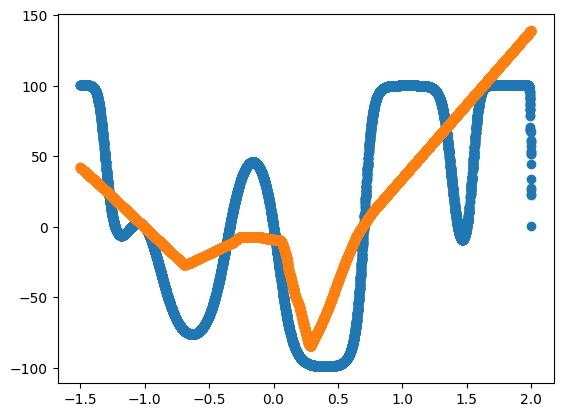

In [199]:
plt.scatter(X_train, y_train, label="training data")
plt.scatter(X_train, population.predict(population.individuals[0]))

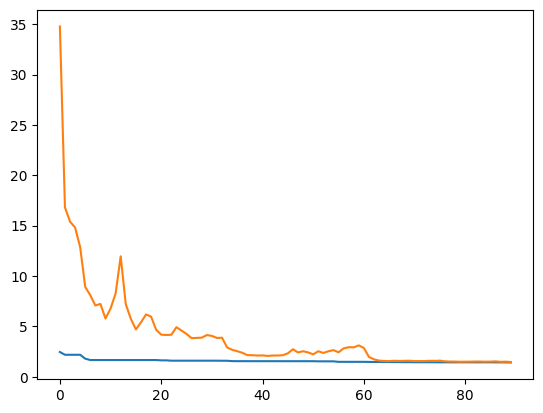

In [200]:
# unscaled MSE

plt.plot(best_scores, label="best scores")
plt.plot(avg_scores, label="average scores")

In [202]:
# iris

X_train = iris["data"]
y_train = iris["target"].reshape(-1, 1)

X_test = iris["data"]
y_test = iris["target"].reshape(-1, 1)

layers = [
    {"output_dim": 5, "activation": "relu", "init": "he"},
    {"output_dim": 5, "activation": "relu", "init": "he"},
    {"output_dim": 3, "activation": "softmax", "init": "normal"}
]

population = Population(layers, X_train, y_train, X_test, y_test, problem_type="classification")

population.generate_individuals(100)


In [217]:
print("Best score before mutation", population.best_score())

for i in range(1000):
    if i % 10 == 0:
        print("Scores after mutation", np.mean(population.get_scores()))
        print("Best score after mutation", population.best_score())
    population.mutate_population(magnitude=0.001, how_many_individuals_mutate=1)
    population.crossover_population(how_many_individuals_crossover=1)
    population.select_individuals(elite=0.05, temp=10)

print("Scores after mutation", np.mean(population.get_scores()))

np.mean(population.individuals[0].predict(X_train.T)== y_train.reshape(-1, 1))

Best score before mutation 0.22694047795822392
Scores after mutation 0.22988214336041757
Best score after mutation 0.22694047795822392
Scores after mutation 0.2283890370028306
Best score after mutation 0.2269117555292791
Scores after mutation 0.22752284379846624
Best score after mutation 0.22687334645202756
Scores after mutation 0.22708024567300392
Best score after mutation 0.22684023666547698
Scores after mutation 0.22712562459094576
Best score after mutation 0.22682015264307892
Scores after mutation 0.22697481496614827
Best score after mutation 0.22679903399598583
Scores after mutation 0.22690831919477109
Best score after mutation 0.22677085806605146
Scores after mutation 0.22693573218497234
Best score after mutation 0.2267518963301994
Scores after mutation 0.2268386806135972
Best score after mutation 0.22673419966110597
Scores after mutation 0.2267915671695786
Best score after mutation 0.2267159437373062
Scores after mutation 0.22678515129838722
Best score after mutation 0.226695756

0.3333333333333333

In [218]:
np.mean(population.individuals[0].predict(X_train.T) == y_train.flatten())

0.6666666666666666

Text(0.5, 1.0, 'True')

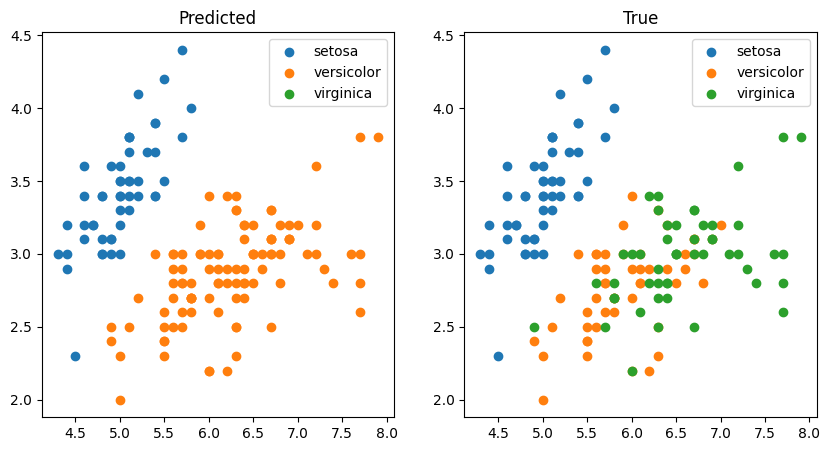

In [219]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

cmap = plt.get_cmap("viridis")

y_pred = population.individuals[0].predict(X_train.T)

ax[0].scatter(X_train[:, 0][y_pred == 0], X_train[:, 1][y_pred == 0], label="setosa")
ax[0].scatter(X_train[:, 0][y_pred == 1], X_train[:, 1][y_pred == 1], label="versicolor")
ax[0].scatter(X_train[:, 0][y_pred == 2], X_train[:, 1][y_pred == 2], label="virginica")
ax[0].set_title("Predicted")

ax[0].legend()
y_train = y_train.flatten()
ax[1].scatter(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], label="setosa")
ax[1].scatter(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], label="versicolor")
ax[1].scatter(X_train[:, 0][y_train == 2], X_train[:, 1][y_train == 2], label="virginica")

ax[1].legend()
ax[1].set_title("True")



In [1954]:
y_train.reshape(-1, 1)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [1909]:
population.individuals[0].predict(X_train.T)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [1220]:
np.mean(np.round(population.individuals[0].full_forward_pass(X_train.T)) == y_train)

0.3288888888888889